## Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

## Integration

Consider the function shown below.

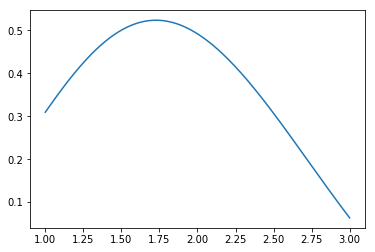

In [2]:
x = np.linspace(1,3,200)

def func(x):
    return np.power(x,2) * np.exp(-x) * np.sin(x)

y = func(x)
plt.plot(x,y);

Integrate the function over the given domain.

In [3]:
class SimpleIntegrator:
    def __init__(self, xMin, xMax, N, f):
        self.xMin = xMin
        self.xMax = xMax
        self.N = N
        self.f = f
        self.dx = (self.xMax - self.xMin) / (self.N-1)
        self.result = 0

    def integrate(self):       
        for i in range(self.N-1):
            x = (self.xMin + i * self.dx)
            self.result = self.result + (self.f(x) * self.dx)
        
    def show(self):
        return round(self.result,5)

for i in [100, 200, 300, 400, 500, 1000]:
    examp = SimpleIntegrator(1,3,i, func)
    examp.integrate()
    print('Using', i, 'steps:', examp.show())

Using 100 steps: 0.76619
Using 200 steps: 0.76497
Using 300 steps: 0.76456
Using 400 steps: 0.76435
Using 500 steps: 0.76423
Using 1000 steps: 0.76399


## Dynamical Systems

In mathematics, a dynamical system is a system in which a function describes the time dependence of a point in a geometrical space. Examples include the mathematical models that describe the swinging of a clock pendulum, the flow of water in a pipe, and the number of fish each springtime in a lake. Generally speaking, a dynamical system is any system that varies through time.

At any given time, a dynamical system has a state given by a tuple of real numbers (a vector) that can be represented by a point in an appropriate state space. The evolution rule of the dynamical system is a function that describes what future states follow from the current state. Often the function is deterministic, that is, for a given time interval only one future state follows from the current state. However, some systems are stochastic, in that random events also affect the evolution of the state variables. 

### Discrete Dynamical Systems

The basic idea here is to consider systems with changes which may be thought of as occuring discretely. One example would be cells which divide synchronously and which you follow at some fixed set of times following cell division. The key here is that there are relatively short and synchronized actions (e.g. breeding seasons) which allows one to ignore the within-time period behavior for the purpose of the model.

#### Example: Random Walk

The expected endpoint of a random walk will hover around the starting point as the probabilities to move in a particular direction, or remaining at the same point, during a particular timestep sum to zero. For example, if we only consider a left or right displacement in the one-dimensional random walk and define $Z_{i}$ as the random variable that specifies a move to the left (-1) or right (+1), then the final state $S$ is given by the sum of all $Z_{i}$. In other words, the expected value of $Z_{i}$ is equal to $1*P(Z_{i} = 1) + -1*P(Z_{i} = -1)$. The latter is equal to $\frac{1}{2} - \frac{1}{2} = 0.$  

* In computer networks, random walks can model the number of transmission packets buffered at a server.
* In population genetics, random walk describes the statistical properties of genetic drift.
* In image segmentation, random walks are used to determine the labels (i.e., “object” or “background”) to associate with each pixel.
* In brain research, random walks and reinforced random walks are used to model cascades of neuron firing in the brain.
* Random walks have also been used to sample massive online graphs such as online social networks.

Ending position at: -35


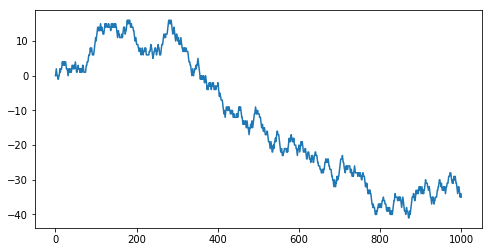

In [4]:
def oneD_random_walk(n=1000):
    prob = [1/3, 2/3]    
    x = 0  
    positions = [x]  
    rr = np.random.random(n)
    
    for i in range(len(rr)):
        if rr[i] < prob[0]:
            x -=1
            positions.append(x)
        elif rr[i] > prob[1]:
            x += 1
            positions.append(x)
        else:
            positions.append(x)
    return positions
    
positions = oneD_random_walk()
print("Ending position at:", positions[-1])
plt.figure(figsize=(8,4))
plt.plot(positions);

Average ending position at: -1.0


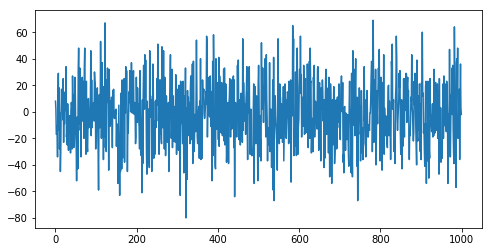

In [5]:
def repeat_oneD_random_walk(m=1000):
    last_pos = np.zeros(m)
    for i in range(m):
        positions = oneD_random_walk()
        last_pos[i] = positions[-1]
    return last_pos

last_pos = repeat_oneD_random_walk()
print("Average ending position at:", np.round(np.mean(last_pos)))
plt.figure(figsize=(8,4))
plt.plot(last_pos);

Walk ended at: 8.0 0.0


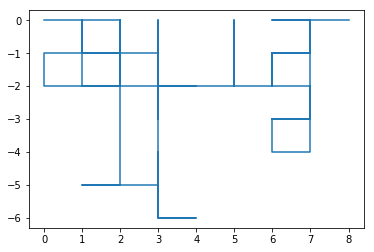

In [6]:
def twoD_random_walk(n=100):
    """
    Input: integer n designating the number of steps
    Output: random walk
    """
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(1, n):
        val = np.random.randint(0, 5)
        if val == 1:
            x[i] = x[i-1] + 1 # move right
            y[i] = y[i-1]
        elif val == 2:
            x[i] = x[i-1] - 1 # move left
            y[i] = y[i-1]
        elif val == 3:
            x[i] = x[i-1]
            y[i] = y[i-1] + 1 # move up
        elif val == 4:
            x[i] = x[i-1]
            y[i] = y[i-1] - 1 # move down
        else:
            x[i] = x[i-1]
            y[i] = y[i-1]
    return(x, y)
    

x, y = twoD_random_walk()
print("Walk ended at:", x[-1], y[-1])
pylab.plot(x, y);

Average ending position at: -0.0 -0.0


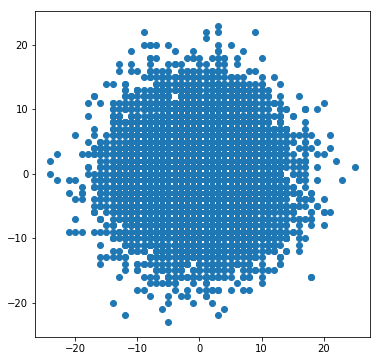

In [7]:
def repeat_twoD_random_walk(m=10000):
    last_x = np.zeros(m)
    last_y = np.zeros(m)

    for i in range(m):
        x, y = twoD_random_walk()
        last_x[i] = x[-1]
        last_y[i] = y[-1]
    return (last_x, last_y)

last_x, last_y = repeat_twoD_random_walk()
print("Average ending position at:", np.round(np.mean(last_x)), np.round(np.mean(last_y)))
plt.figure(figsize=(6,6))
plt.scatter(last_x, last_y);

#### Example: Discrete Time Ground Vehicle

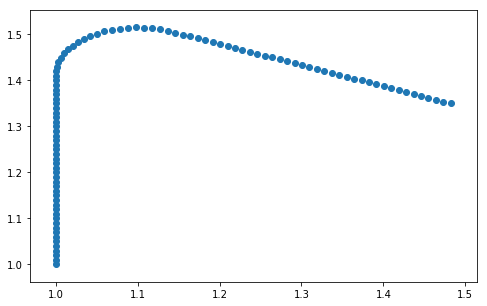

In [8]:
class DiscreteTimeGroundVehicle:
    def __init__(self, x1, x2, v1, v2):
        self.x1 = x1 # x-coordinate of position
        self.x2 = x2 # y-coordinate of position
        self.x3 = 0 # angle with the horizontal
        self.v1 = v1 # force/thrust
        self.v2 = v2 # angular speed
        self.d = 0.01 # constant multiplied with v1
        self.c = 0.1 # constant multiplied with v2
        
    def update_state(self):
        self.x1 = self.x1 + self.d * np.sin(self.x3) * self.v1
        self.x2 = self.x2 + self.d * np.cos(self.x3) * self.v1
        self.x3 = self.x3 + self.c * self.v2
        
    def set_angular_speed(self, ang_speed):
        self.v2 = ang_speed
        
    def get_state(self):
        return (self.x1, self.x2, self.x3)
        
    def get_total_time(self):
        return self.t
        
# instantiate and run a discrete-time ground vehicle
gv = DiscreteTimeGroundVehicle(1, 1, 1, 0)
steps = 100
x = np.zeros(steps)
y = np.zeros(steps)

for i in range(steps):
    x1,x2,x3 = gv.get_state()
    x[i] = x1
    y[i] = x2
    gv.update_state()
    if i == 40:
        gv.set_angular_speed(1)
    if i == 60:
        gv.set_angular_speed(0)

plt.figure(figsize=(8,5))
plt.scatter(x, y);

### Continuous Dynamical Systems

#### Logistic Growth of Natural Populations.

In [9]:
class Logistic:
    """This class defines the Logistic population
    growth of a population which has a limited size C
    and a growth rate of nu.

    Attributes:
        nu    Growth rate of the population
        C     Limit size of the population
    """
    def __init__(self,nu,C):
        self.nu = nu
        self.C = C

    def __call__(self,x,t):
        return self.nu*(1-x/self.C)*x

The limit size, or carrying capacity, of the population determines the growth characteristics of  population.

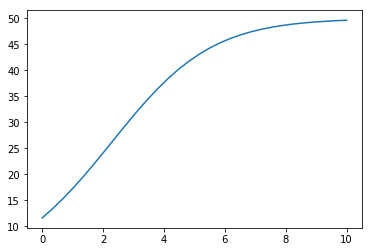

In [10]:
l = Logistic(0.2, 50)
x = 10
y = []
for t in np.linspace(0,10,30):
    x = x + l(x, t)
    y.append(x)
    
plt.plot(np.linspace(0,10,30), y);

#### Example: Predator-Prey Relationship.

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey.

https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations

In [11]:
class LotkaVolterra:
    """This class defines the Lotka--Voltera prey-predator
    system. There are 4 parameters in this class which 
    define the evolution of the system.

    Attributes:
        k_a     reproduction rate of the antelopes
        k_ca    death rate of antelopes when they meet cheetahs
        k_c     death rate of cheetahs
        k_a     reproduction rate of the cheetahs when they meet antelopes
    """
    def __init__(self, k_a, k_ca, k_c, k_ac):
        self.k_a = k_a
        self.k_ca = k_ca
        self.k_c = k_c
        self.k_ac = k_ac

    def __call__(self,x,t):
        y = np.zeros(len(x))
        y[0] = self.k_a * x[0] - self.k_ca * x[0] * x[1]
        y[1] = -self.k_c * x[1] + self.k_ac * x[0] * x[1]

        return y

#### Solving Ordinary Differential Equations.

The Euler method (also called forward Euler method) is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. It is the most basic explicit method for numerical integration of ordinary differential equations and is the simplest Runge–Kutta method.  

If one knows the value of y at the first value of x, $x_{0}$, and the value of the derivative at this point as well, one can write down the equation of the tangent line at $x_{0}$:

$y = y_{0} + f(x_{0},y_{0})(x − x_{0})$. This process can then be repeated with the current value of x and y.

In [12]:
class ExplicitEuler:
    """This class defines the Explicit Euler 
    scheme for the numerical resolution of 
    a differential equation.
    """
    def __init__(self, f):
        self.f = f

    def iterate(self, x0, t, dt):
        return x0 + dt * self.f(x0, t)

The Runga-Kutta method is a method of numerically integrating ordinary differential equations by using a trial step at the midpoint of an interval to cancel out lower-order error terms.

In [13]:
class RK2:
    """This class defines the Runge-Kutta 2 
    scheme for the numerical resolution of 
    a differential equation.
    """
    def __init__(self,f):
        self.f = f

    def iterate(self,x0,t,dt):
        return x0 + dt * self.f(x0 + dt/2 * self.f(x0,t),t+dt/2)

The `Integrator` class can accept different methods provided they contain an appropriate `iterate` method.

In [14]:
class Integrator:
    """This class defines the Integration  
    of a differential equation between tMin and tMax
    with N discretization steps and x0 as an initial condition
    """
    def __init__(self, method, x0, tMin, tMax, N):
        self.x0   = x0
        self.tMin = tMin
        self.tMax = tMax
        self.dt   = (tMax - tMin)/(N-1)

        self.f = method

    def getIntegrationTime(self):
        return np.arange(self.tMin,self.tMax+self.dt,self.dt)
        
    def integrate(self):
        x = np.array([self.x0])
        for t in np.arange(self.tMin,self.tMax,self.dt):
            x = np.append( x, [self.f.iterate(x[-1,:], t, self.dt)],axis=0)
        return x

Helper functions for plotting.

In [15]:
def plotData(x,y,color,legend):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    plt.rc('xtick', labelsize=10)    
    plt.rc('ytick', labelsize=10)    
    plt.ylabel('$a(t),c(t)$',fontsize=10)
    plt.xlabel('$t$', fontsize=10)

    plt.plot(x,y,color,linewidth=2.0,label=legend)
    plt.legend(loc=2,prop={'size':10})

# Parametric plot of x vs y
def parametricPlotData(x,y,color,xAxis,yAxis,legend):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    plt.rc('xtick', labelsize=20)    
    plt.rc('ytick', labelsize=20)    
    plt.xlabel('$'+xAxis+'$',fontsize=20)
    plt.ylabel('$'+yAxis+'$',fontsize=20)
    
    plt.plot(x,y,color,linewidth=2.0,label=legend)
    plt.legend(loc=2,prop={'size':20})

Plotting the cheetah and antelope populations over time using Euler and RK2. Note that the RK2 method seems more stable.

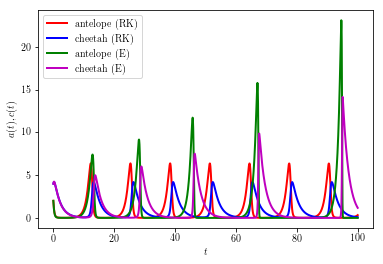

In [16]:
# Plot the population of the antelope and the cheetah
x0 = np.array([2, 4])
tmin = 0
tmax = 100

rk2 = Integrator(RK2(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,2000)
eul = Integrator(ExplicitEuler(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,2000)

plotData(rk2.getIntegrationTime(),rk2.integrate()[:,0],'r-',"antelope (RK)")
plotData(rk2.getIntegrationTime(),rk2.integrate()[:,1],'b-',"cheetah (RK)")
plotData(eul.getIntegrationTime(),eul.integrate()[:,0],'g-',"antelope (E)")
plotData(eul.getIntegrationTime(),eul.integrate()[:,1],'m-',"cheetah (E)")

In the plot below note the expanding population sizes with the Euler but not the RK2 method.

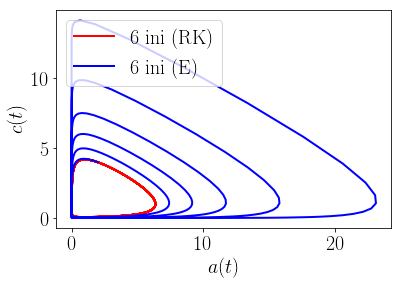

In [17]:
parametricPlotData(rk2.integrate()[:,0], rk2.integrate()[:,1],'r-','a(t)','c(t)',"6 ini (RK)")
parametricPlotData(eul.integrate()[:,0], eul.integrate()[:,1],'b-','a(t)','c(t)',"6 ini (E)")

0.0011179601540876514
0.00035601631175685624
0.00010598640665514971
2.4759931715126368e-05


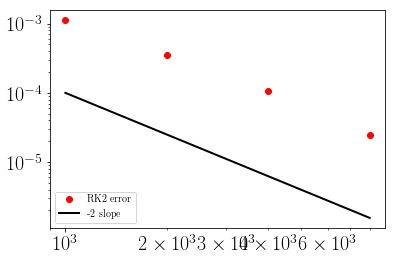

0.010258956136401804
0.0036182851562700405
0.001287294870538054
0.0004652633431428673


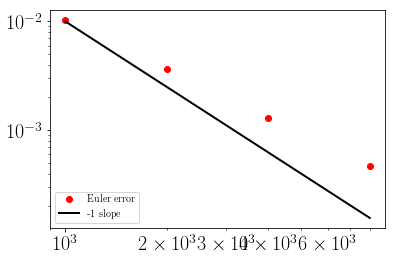

In [18]:
# Compues the errror between 2 solutions with a given ratio 
# in term of resolution points
def computeError(x,xRef,ratio):
    iMax = np.size(xRef,axis=0)
    totError = 0
    for i in np.arange(0,np.size(xRef,axis=1)):
        totError += math.sqrt(np.sum(np.square(x[:,i]-xRef[0:iMax:ratio,i])))/np.size(x[:,i])
    
    return totError


n_rk = np.array([1000, 2000, 4000, 8000])
n_e = np.array([1000, 2000, 4000, 8000])

n_ref = 16000
tmin = 0
tmax = 13

rk2 = Integrator(RK2(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,n_ref)
solRefRK = rk2.integrate()

eul = Integrator(ExplicitEuler(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,n_ref)
solRefE = eul.integrate()


errRK = []
for i in n_rk:
    rk = Integrator(RK2(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,i)
    r_rk = n_ref//i
    errRK.append(computeError(rk.integrate(),solRefRK,r_rk))
    print(computeError(rk.integrate(),solRefRK,r_rk))

plt.loglog(n_rk,errRK,'ro',linewidth=2.0,label="RK2 error")
plt.loglog(n_rk,np.power(n_rk/10,-2),'k-',linewidth=2.0,label="-2 slope")
plt.legend(loc=3)
plt.show()

errE = []
for i in n_rk:
    e = Integrator(ExplicitEuler(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,i)
    r_rk = n_ref//i
    errE.append(computeError(e.integrate(),solRefRK,r_rk))
    print(computeError(e.integrate(),solRefRK,r_rk))


plt.loglog(n_rk,errE,'ro',linewidth=2.0,label="Euler error")
plt.loglog(n_rk,np.power(n_e/100,-2),'k-',linewidth=2.0,label="-1 slope")
plt.legend(loc=3)

#### Explicit and Implicit Euler.

A comparison between the explicit and implicit Euler methods.

In [19]:
def explicit_euler(s0, t0, dt, t):
    res = np.zeros(t+1)
    res[0] = s0
    for i in range(1, t+1):
        res[i] = (res[i-1] * (1 - 10*dt))
    return res
        
res = explicit_euler(1, 0, 0.25, 4)
print(res)

[ 1.     -1.5     2.25   -3.375   5.0625]


In [20]:
def implicit_euler(s0, t0, dt, t):
    res = np.zeros(t+1)
    res[0] = s0
    for i in range(1, t+1):
        res[i] = (res[i-1] / (1 + 10*dt))
    return res

res = implicit_euler(1, 0, 0.25, 4)
print(res)

[1.         0.28571429 0.08163265 0.02332362 0.00666389]


In [21]:
for dt in [0.05, 0.1, 0.15, 0.2, 0.25]:
    print(explicit_euler(1, 0, dt, 4))

[1.     0.5    0.25   0.125  0.0625]
[1. 0. 0. 0. 0.]
[ 1.     -0.5     0.25   -0.125   0.0625]
[ 1. -1.  1. -1.  1.]
[ 1.     -1.5     2.25   -3.375   5.0625]


In [22]:
for dt in [0.05, 0.1, 0.15, 0.2, 0.25]:
    print(implicit_euler(1, 0, dt, 4))

[1.         0.66666667 0.44444444 0.2962963  0.19753086]
[1.     0.5    0.25   0.125  0.0625]
[1.     0.4    0.16   0.064  0.0256]
[1.         0.33333333 0.11111111 0.03703704 0.01234568]
[1.         0.28571429 0.08163265 0.02332362 0.00666389]
